## **Deep Learning**
In this section We will build a simple multilayer perceptron network(**MLP**) in TensorFlow

In [99]:
  # Lets import the required libraries
  import numpy as np
  from tensorflow import keras
  from tensorflow.keras import layers
  import matplotlib.pyplot as plt

### **Load Dataset**
We will be using MNIST dataset of handwritten digits

Just run the cell below to load dataset

In [100]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("No. of training examples = ",x_train.shape[0])
print("Size of each image in dataset = ",x_train.shape[1:])
print("No. of test examples = ",x_test.shape[0])

No. of training examples =  60000
Size of each image in dataset =  (28, 28)
No. of test examples =  10000


label: 1       4       2       7       0       

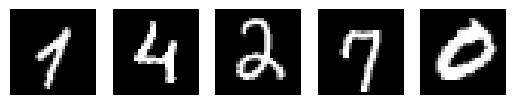

In [101]:
# Run this cell to visualize some of the images from dataset

n = 5  # = no. of images to visualize

index = np.random.choice(x_train.shape[0],5)  # choose random index
print("label: ",end="")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_train[ind],cmap="gray")
    plt.axis("off")
    print(y_train[ind],end="       ")

plt.show()

#### Preprocess dataset
Since we are building a MLP model the input to the model should be a vector rather than a 28 by 28 matrix.

So your **First Task** is to flatten the images

(Hint: use *reshape()* method of arrays...)

Next, create validation dataset out of training dataset.

You can use 50K images for training and 10K for validation

In [102]:
# Flatten the images into 1-d vectors

x_train_flatten = x_train.reshape(x_train.shape[0], -1)                                   # flatten the images of training set
x_test_flatten = x_test.reshape(x_test.shape[0], -1)                                     # flatten th eimages of test set


# Divide the training data into training and validation data....

n_validation = 10000                                        # choose number of images to be used for validation

x_validation = x_train_flatten[:n_validation]
y_validation = y_train[:n_validation]

x_train_flatten = x_train_flatten[n_validation:]
y_train = y_train[n_validation:]


### **Build a model**
You can choose whatever architechure you want, but ensure that it is **not too deep** as that will take too much time to train and **not too shallow** as that will give very low accuracy.

In [103]:
model = keras.models.Sequential([
 layers.Input(shape=(784,)),

    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(64, activation='relu'),

    layers.Dense(10, activation='softmax')
])

# Make a graphical representation of the model...
keras.utils.plot_model(model, show_shapes=True)
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 479,050 (1.83 MB)

 Trainable params: 477,770 (1.82 MB)

 Non-trainable params: 1,280 (5.00 KB)

#### Compile and Train
Choose an optimizer- method that minimizes loss function

**adam** optimizer is one of the popular choices. You should read about these online

In [104]:
model.compile(optimizer="adam",loss = "sparse_categorical_crossentropy",metrics=["accuracy"])

n_epochs = 10    # set number of epochs
batch_size = 216           # you can tweak with these parametrs
history = model.fit( x_train_flatten, y_train,                # Training data
    epochs=n_epochs,
    batch_size=batch_size,
    validation_data=(x_validation, y_validation))

Epoch 1/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.8207 - loss: 0.5812 - val_accuracy: 0.9596 - val_loss: 0.1278
Epoch 2/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9592 - loss: 0.1300 - val_accuracy: 0.9733 - val_loss: 0.0890
Epoch 3/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9726 - loss: 0.0868 - val_accuracy: 0.9733 - val_loss: 0.0909
Epoch 4/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9779 - loss: 0.0698 - val_accuracy: 0.9764 - val_loss: 0.0755
Epoch 5/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.9837 - loss: 0.0522 - val_accuracy: 0.9807 - val_loss: 0.0692
Epoch 6/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9839 - loss: 0.0478 - val_accuracy: 0.9759 - val_loss: 0.0822
Epoch 7/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9866 - loss: 0.0398 - val_accuracy: 0.9787 - val_loss: 0.0752
Epoch 8/10
232/232 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9883 - loss: 0.0352 - val_acc

### **Evaluate**
Evaluate your model on test data.

And Show some results

Loss =  0.06812788546085358
Accuracy =  98.15999865531921 %


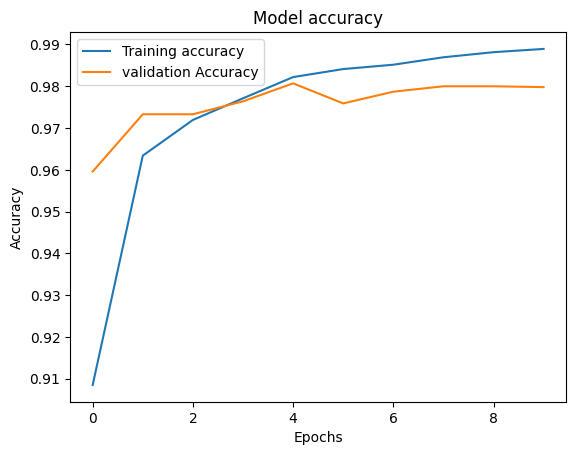

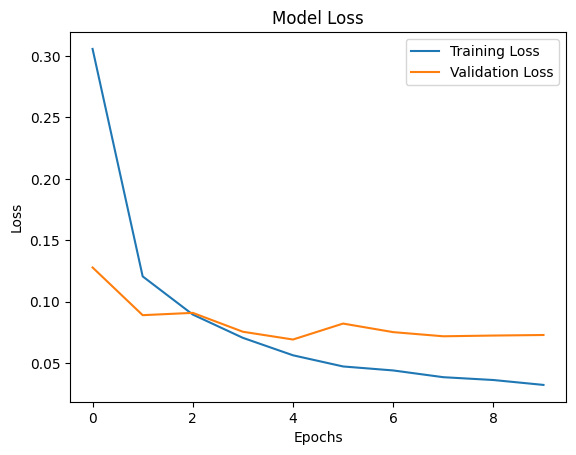

In [105]:
results = model.evaluate(x_test_flatten, y_test, verbose=0)
print("Loss = ",results[0])
print("Accuracy = ",results[1]*100,"%")

# Plot Accuracy...
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="validation Accuracy")
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Similarly write code to plot loss...

plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Lets show our results on images from testing dataset

label: 
1       4       3       2       6       

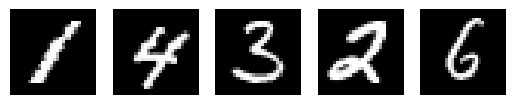

Predicted value: 
1      4      3      2      6      

In [106]:
n = 5   # = no. of images to see predictions on

index = np.random.choice(x_test.shape[0], n, replace=False)  # choose random index from test data
print("label: ")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_test[ind], cmap="gray")             # fill code to show images from test set
    plt.axis("off")
    print(y_test[ind],end="       ")

plt.show()
print("Predicted value: ")

# Now lets print the predictions

for i, ind in enumerate(index):
    image = x_test_flatten[ind].reshape(1, -1)
    prediction = model.predict(image, verbose=0)
    digit = np.argmax(prediction)
    print(digit, end="      ")